<a href="https://colab.research.google.com/github/zakihir0/first-commit/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/zakihir0/first-commit.git

Cloning into 'first-commit'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 13), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [2]:
!pip install optuna
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 13.5 MB/s 
     |████████████████████████████████| 209 kB 61.9 MB/s 
     |████████████████████████████████| 81 kB 4.2 MB/s 
     |████████████████████████████████| 78 kB 2.2 MB/s 
     |████████████████████████████████| 50 kB 3.5 MB/s 
     |████████████████████████████████| 147 kB 60.4 MB/s 
     |████████████████████████████████| 112 kB 6.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=f31dc03999369ec666b90192dcef14c0c295bb3c2320da4043dd5063766e6706
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import glob
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import (roc_curve, auc)
import matplotlib.pyplot as plt
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
from imblearn.under_sampling import ClusterCentroids
from optuna.integration import lightgbm as lgb
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (PrecisionRecallDisplay, RocCurveDisplay,
                             accuracy_score, adjusted_mutual_info_score,
                             adjusted_rand_score, auc, average_precision_score,
                             balanced_accuracy_score, brier_score_loss,
                             calinski_harabasz_score, check_scoring,
                             classification_report, cluster, cohen_kappa_score,
                             completeness_score, confusion_matrix,
                             consensus_score, coverage_error, d2_tweedie_score,
                             davies_bouldin_score, dcg_score, det_curve,
                             euclidean_distances, explained_variance_score,
                             f1_score, fbeta_score, fowlkes_mallows_score,
                             get_scorer, hamming_loss, hinge_loss,
                             homogeneity_completeness_v_measure,
                             homogeneity_score, jaccard_score,
                             label_ranking_average_precision_score,
                             label_ranking_loss, log_loss, make_scorer,
                             matthews_corrcoef, max_error, mean_absolute_error,
                             mean_absolute_percentage_error,
                             mean_gamma_deviance, mean_pinball_loss,
                             mean_poisson_deviance, mean_squared_error,
                             mean_squared_log_error, mean_tweedie_deviance,
                             median_absolute_error,
                             multilabel_confusion_matrix, mutual_info_score,
                             nan_euclidean_distances, ndcg_score,
                             normalized_mutual_info_score,
                             pair_confusion_matrix, pairwise_distances,
                             pairwise_distances_argmin,
                             pairwise_distances_argmin_min,
                             pairwise_distances_chunked, pairwise_kernels,
                             plot_confusion_matrix, plot_det_curve,
                             plot_precision_recall_curve, plot_roc_curve,
                             precision_recall_curve,
                             precision_recall_fscore_support, precision_score,
                             r2_score, rand_score, recall_score, roc_auc_score,
                             roc_curve, silhouette_samples, silhouette_score,
                             top_k_accuracy_score, v_measure_score,
                             zero_one_loss)
from sklearn.model_selection import (BaseCrossValidator, BaseShuffleSplit,
                                     GridSearchCV, GroupKFold,
                                     GroupShuffleSplit, KFold,
                                     LeaveOneGroupOut, LeaveOneOut,
                                     LeavePGroupsOut, LeavePOut,
                                     PredefinedSplit, RepeatedKFold,
                                     RepeatedStratifiedKFold, ShuffleSplit,
                                     StratifiedGroupKFold, StratifiedKFold,
                                     StratifiedShuffleSplit,
                                     check_cv, cross_val_predict,
                                     cross_val_score, cross_validate,
                                     learning_curve, permutation_test_score,
                                     train_test_split, validation_curve)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

In [4]:
test = pd.read_csv("https://raw.githubusercontent.com/zakihir0/first-commit/main/test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/zakihir0/first-commit/main/train.csv")

In [5]:
colname = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']

In [6]:
df = train[colname]

In [7]:
df_obj_colname = df.columns[df.dtypes == "object"]
print(f"df_obj_colname: {df_obj_colname}")

train[['CabinDeck','CabinNum','CabinSide']] = train['Cabin'].str.split('/', expand=True)
test[['CabinDeck','CabinNum','CabinSide']] = test['Cabin'].str.split('/', expand=True)
display(train)

df_obj_colname: Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


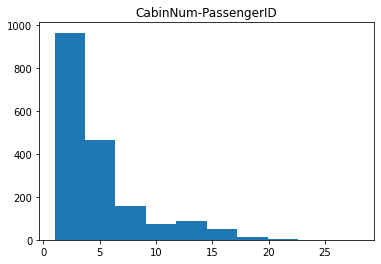

CabinDeck
A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: PassengerId, dtype: int64
CabinSide
P    4206
S    4288
Name: PassengerId, dtype: int64


In [8]:
plt.hist(train.groupby(by=["CabinNum"])["PassengerId"].count())
plt.title("CabinNum-PassengerID")
plt.show()

train["CabinNum"] = pd.to_numeric(train["CabinNum"])
test["CabinNum"] = pd.to_numeric(test["CabinNum"])

print(train.groupby(by=["CabinDeck"])["PassengerId"].count())

print(train.groupby(by=["CabinSide"])["PassengerId"].count())

In [9]:
train = train.drop("Cabin", axis=1)
test = test.drop("Cabin", axis=1)

train_dummy_colname = train[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', "CabinDeck", "CabinNum", "CabinSide"]].columns
print(f"train_dummy_colname: {train_dummy_colname}")

train_drop = train.drop("PassengerId", axis=1)
train_drop.dropna(inplace=True)

display(train_drop)

train_dummy_colname: Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck',
       'CabinNum', 'CabinSide'],
      dtype='object')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S


In [10]:
df_data_list = []
for i in range(len(df_obj_colname)):
  df_colname = df.columns[i]
  df_data = pd.unique(df[df_colname])
  df_data_list.append(df_data)
df_data_list

[array(['Europa', 'Earth', 'Mars', nan], dtype=object),
 array([False, True, nan], dtype=object),
 array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
       dtype=object),
 array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object),
 array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
        48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
        47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
        36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
        67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
        79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
        69., 72., 77.])]

In [11]:
dataset = pd.get_dummies(train_drop[train_dummy_colname])

In [12]:
y = train["Transported"]

In [13]:
dataset.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    8,    9,   11,
            ...
            8681, 8682, 8683, 8685, 8686, 8688, 8689, 8690, 8691, 8692],
           dtype='int64', length=6606)

In [14]:
dataset

,CabinNum,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0.0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
1,0.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0.0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,0,1,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
4,1.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,98.0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8689,1499.0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
8690,1500.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
8691,608.0,0,1,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
y = y.iloc[dataset.index, ]

: 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

: 

In [ ]:
df = pd.concat([dataset, y], axis=1)
df = pd.concat([dataset, y], axis=1)

: 

In [17]:
df

,CabinNum,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,...,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S,Transported
0,0.0,0,1,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,False
1,0.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,True
2,0.0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,False
3,0.0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,False
4,1.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,98.0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,False
8689,1499.0,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,False
8690,1500.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,True
8691,608.0,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,False


In [ ]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1] 

: 

In [19]:
X.to_csv("X.csv")
y.to_csv("y.csv")

In [20]:
X_scaled = (X-X.mean())/X.std()

In [21]:
X_scaled

,CabinNum,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,-1.166962,-1.082981,1.717017,-0.510772,0.738608,-0.738608,-0.520181,-0.322665,0.665997,0.158543,...,-0.179844,3.085072,-0.312266,-0.244957,-0.339552,-0.695045,-0.652529,-0.017401,1.012721,-1.012721
1,-1.166962,0.923237,-0.582317,-0.510772,0.738608,-0.738608,-0.520181,-0.322665,0.665997,0.158543,...,-0.179844,-0.324093,-0.312266,-0.244957,-0.339552,1.438537,-0.652529,-0.017401,-0.987289,0.987289
2,-1.166962,-1.082981,1.717017,-0.510772,0.738608,-0.738608,-0.520181,-0.322665,0.665997,-6.306485,...,5.559529,-0.324093,-0.312266,-0.244957,-0.339552,-0.695045,-0.652529,-0.017401,-0.987289,0.987289
3,-1.166962,-1.082981,1.717017,-0.510772,0.738608,-0.738608,-0.520181,-0.322665,0.665997,0.158543,...,5.559529,-0.324093,-0.312266,-0.244957,-0.339552,-0.695045,-0.652529,-0.017401,-0.987289,0.987289
4,-1.165015,0.923237,-0.582317,-0.510772,0.738608,-0.738608,-0.520181,-0.322665,0.665997,0.158543,...,-0.179844,-0.324093,-0.312266,-0.244957,-0.339552,1.438537,-0.652529,-0.017401,-0.987289,0.987289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,-0.976097,-1.082981,1.717017,-0.510772,0.738608,-0.738608,1.922118,-0.322665,-1.501281,-6.306485,...,5.559529,-0.324093,-0.312266,-0.244957,-0.339552,-0.695045,-0.652529,-0.017401,1.012721,-1.012721
8689,1.752501,0.923237,-0.582317,-0.510772,-1.353693,1.353693,-0.520181,3.098722,-1.501281,0.158543,...,-0.179844,-0.324093,-0.312266,-0.244957,-0.339552,-0.695045,1.532268,-0.017401,-0.987289,0.987289
8690,1.754448,0.923237,-0.582317,-0.510772,0.738608,-0.738608,-0.520181,-0.322665,0.665997,0.158543,...,-0.179844,-0.324093,-0.312266,-0.244957,-0.339552,-0.695045,1.532268,-0.017401,-0.987289,0.987289
8691,0.017183,-1.082981,1.717017,-0.510772,0.738608,-0.738608,1.922118,-0.322665,-1.501281,0.158543,...,-0.179844,-0.324093,-0.312266,-0.244957,2.944609,-0.695045,-0.652529,-0.017401,-0.987289,0.987289


In [22]:
class XGBClassifier:
    def __init__(self, name):
        self.name = name
        
    def validation(X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
        print('train dataset shape %s' % Counter(y))
        print('train dataset shape %s' % Counter(y_train))
        
    def sampler(X_train, y_train, sampler):
        X_res, y_res = sampler.fit_resample(X_train, y_train) 
        print('Resampled dataset shape %s' % Counter(y_res))
        return X_res, y_res

    def XGBoostClassifier_opt(X_train, X_test, y_train, y_test):
        def objective(trial):
          params = {
              'n_estimators': trial.suggest_int('n_estimators', 0, 1000), 
              'max_depth': trial.suggest_int('max_depth', 1, 20), 
              'min_child_weight': trial.suggest_int('min_child_weight', 1, 20), 
              'subsample':trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1), 
              'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
              'verbose': 0
              }
          model = XGBClassifier(**params)
          model.fit(X_train, y_train)
          pred = model.predict(X_test)
          accuracy = accuracy_score(y_test, pred)
          return (1-accuracy)

        study = optuna.create_study()
        study.optimize(objective, n_trials=300)
        return study

In [23]:
from imblearn.ensemble import BalancedBaggingClassifier

In [24]:
def validation(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
    print('train dataset shape %s' % Counter(y))
    print('train dataset shape %s' % Counter(y_train))
    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = validation(X_scaled, y)

train dataset shape Counter({True: 3327, False: 3279})
train dataset shape Counter({True: 2994, False: 2951})


In [26]:
estimator = RandomForestClassifier(n_jobs=-1)
model = BalancedBaggingClassifier(base_estimator=estimator, n_jobs=-1, n_estimators=10, sampling_strategy='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

AttributeError: ignored

In [ ]:
def XGBoostClassifier(X_train, X_test, y_train, y_test, study):
  model = XGBClassifier(params=study.best_params,
                  dtrain=X_train,
                  num_boost_round=1000,
                  early_stopping_rounds=5,
                  evals=[(y_train, "test")])
  model = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  print("accuracy scores", accuracy_score(y_test, y_pred))
  metrics.roc_auc_score(y_test, y_pred)
  matrix = metrics.confusion_matrix(y_test, y_pred, normalize="all", labels=[False, True])
  ax = sns.heatmap(matrix, annot=True, cmap="Blues")
  
  y_proba = model.predict_proba(X_test)

  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:, 1])
  auc = metrics.auc(fpr, tpr)
  
  plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
  plt.legend()
  plt.xlabel('FPR: False positive rate')
  plt.ylabel('TPR: True positive rate')
  plt.grid()
  plt.show()

In [ ]:
X_res, y_res = sampler(X_train, y_train, EditedNearestNeighbours())

Resampled dataset shape Counter({False: 2951, True: 1385})


In [ ]:
study = XGBoostClassifier_opt(X_res, X_test, y_res, y_test)

[I 2022-12-11 00:19:31,023] A new study created in memory with name: no-name-255b01b1-531f-46f1-87f2-9a519fd6b8a2
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pa

[00:19:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:31,617] Trial 0 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 243, 'max_depth': 9, 'min_child_weight': 13, 'subsample': 0.7, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.25113464447806355.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of

[00:19:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:32,479] Trial 1 finished with value: 0.2571860816944024 and parameters: {'n_estimators': 228, 'max_depth': 20, 'min_child_weight': 4, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.25113464447806355.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[00:19:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGB

[I 2022-12-11 00:19:33,378] Trial 3 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 703, 'max_depth': 1, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.25113464447806355.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of

[00:19:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:35,061] Trial 4 finished with value: 0.2617246596066566 and parameters: {'n_estimators': 931, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.5, 'colsample_bytree': 0.7}. Best is trial 0 with value: 0.25113464447806355.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of l

[00:19:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:35,288] Trial 5 finished with value: 0.254160363086233 and parameters: {'n_estimators': 102, 'max_depth': 12, 'min_child_weight': 13, 'subsample': 0.5, 'colsample_bytree': 0.7}. Best is trial 0 with value: 0.25113464447806355.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[00:19:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:35,556] Trial 6 finished with value: 0.26475037821482605 and parameters: {'n_estimators': 175, 'max_depth': 2, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.25113464447806355.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of

[00:19:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:19:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:36,420] Trial 8 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 241, 'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.7, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.25113464447806355.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[00:19:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:37,833] Trial 9 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 767, 'max_depth': 10, 'min_child_weight': 12, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 0 with value: 0.25113464447806355.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:19:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:38,764] Trial 10 finished with value: 0.254160363086233 and parameters: {'n_estimators': 449, 'max_depth': 6, 'min_child_weight': 20, 'subsample': 0.8, 'colsample_bytree': 0.8}. Best is trial 0 with value: 0.25113464447806355.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[00:19:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:39,564] Trial 11 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 393, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:40,688] Trial 12 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 444, 'max_depth': 14, 'min_child_weight': 16, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:41,665] Trial 13 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 460, 'max_depth': 15, 'min_child_weight': 17, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:42,794] Trial 14 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 582, 'max_depth': 16, 'min_child_weight': 20, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:19:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:43,524] Trial 15 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 347, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:44,633] Trial 16 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 573, 'max_depth': 14, 'min_child_weight': 15, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:19:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:45,302] Trial 17 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 354, 'max_depth': 18, 'min_child_weight': 19, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:46,475] Trial 18 finished with value: 0.254160363086233 and parameters: {'n_estimators': 571, 'max_depth': 18, 'min_child_weight': 15, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:19:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:47,199] Trial 19 finished with value: 0.254160363086233 and parameters: {'n_estimators': 339, 'max_depth': 12, 'min_child_weight': 17, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:19:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:49,010] Trial 20 finished with value: 0.254160363086233 and parameters: {'n_estimators': 724, 'max_depth': 7, 'min_child_weight': 8, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[00:19:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:49,710] Trial 21 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 359, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:50,368] Trial 22 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 316, 'max_depth': 12, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:51,254] Trial 23 finished with value: 0.254160363086233 and parameters: {'n_estimators': 450, 'max_depth': 18, 'min_child_weight': 18, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:19:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:51,897] Trial 24 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 331, 'max_depth': 17, 'min_child_weight': 19, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:52,487] Trial 25 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 276, 'max_depth': 12, 'min_child_weight': 14, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:52,972] Trial 26 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 219, 'max_depth': 12, 'min_child_weight': 14, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:54,002] Trial 27 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 503, 'max_depth': 14, 'min_child_weight': 12, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:55,218] Trial 28 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 642, 'max_depth': 11, 'min_child_weight': 15, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:55,552] Trial 29 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 142, 'max_depth': 7, 'min_child_weight': 13, 'subsample': 0.6, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:19:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:55,996] Trial 30 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 163, 'max_depth': 7, 'min_child_weight': 12, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:19:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:56,620] Trial 31 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 283, 'max_depth': 13, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:57,170] Trial 32 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 281, 'max_depth': 5, 'min_child_weight': 13, 'subsample': 0.6, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:19:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:19:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:19:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:19:57,936] Trial 35 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 173, 'max_depth': 4, 'min_child_weight': 9, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:19:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:19:58,836] Trial 36 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 426, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:19:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:19:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:00,002] Trial 37 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 504, 'max_depth': 16, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:01,279] Trial 38 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 408, 'max_depth': 19, 'min_child_weight': 1, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:01,897] Trial 39 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 276, 'max_depth': 11, 'min_child_weight': 11, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:03,506] Trial 40 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 953, 'max_depth': 13, 'min_child_weight': 19, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:04,120] Trial 41 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 351, 'max_depth': 15, 'min_child_weight': 17, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:04,960] Trial 42 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 401, 'max_depth': 13, 'min_child_weight': 14, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:05,696] Trial 43 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 387, 'max_depth': 15, 'min_child_weight': 17, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:06,190] Trial 44 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 210, 'max_depth': 8, 'min_child_weight': 13, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:07,068] Trial 45 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 484, 'max_depth': 17, 'min_child_weight': 16, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:08,494] Trial 46 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 857, 'max_depth': 11, 'min_child_weight': 14, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:10,071] Trial 47 finished with value: 0.254160363086233 and parameters: {'n_estimators': 892, 'max_depth': 10, 'min_child_weight': 11, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:20:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:20:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:20:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:20:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:20:11,848] Trial 51 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 295, 'max_depth': 12, 'min_child_weight': 14, 'subsample': 0.6, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:12,358] Trial 52 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 250, 'max_depth': 14, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:12,762] Trial 53 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 196, 'max_depth': 10, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:13,991] Trial 54 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 832, 'max_depth': 3, 'min_child_weight': 17, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:14,718] Trial 55 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 371, 'max_depth': 9, 'min_child_weight': 12, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:15,840] Trial 56 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 635, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:16,474] Trial 57 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 305, 'max_depth': 11, 'min_child_weight': 13, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:17,366] Trial 58 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 543, 'max_depth': 8, 'min_child_weight': 15, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:20:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:18,132] Trial 59 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 420, 'max_depth': 13, 'min_child_weight': 19, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:18,647] Trial 60 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 228, 'max_depth': 14, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:19,223] Trial 61 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 256, 'max_depth': 14, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:19,917] Trial 62 finished with value: 0.254160363086233 and parameters: {'n_estimators': 310, 'max_depth': 12, 'min_child_weight': 14, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:20:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:20,668] Trial 63 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 458, 'max_depth': 17, 'min_child_weight': 20, 'subsample': 0.6, 'colsample_bytree': 0.5}. Best is trial 11 with value: 0.24810892586989408.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:21,335] Trial 64 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 333, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:21,666] Trial 65 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 130, 'max_depth': 16, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:22,225] Trial 66 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 237, 'max_depth': 11, 'min_child_weight': 13, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:20:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:23,283] Trial 68 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 443, 'max_depth': 19, 'min_child_weight': 19, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:23,938] Trial 69 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 332, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:24,653] Trial 70 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 363, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:26,300] Trial 71 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 991, 'max_depth': 14, 'min_child_weight': 17, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:27,004] Trial 72 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 329, 'max_depth': 18, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:27,812] Trial 73 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 420, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:28,729] Trial 74 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 479, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:29,405] Trial 75 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 331, 'max_depth': 16, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:30,148] Trial 76 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 368, 'max_depth': 17, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:30,576] Trial 77 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 184, 'max_depth': 14, 'min_child_weight': 16, 'subsample': 0.8, 'colsample_bytree': 0.9}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:30,997] Trial 78 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 189, 'max_depth': 12, 'min_child_weight': 14, 'subsample': 0.6, 'colsample_bytree': 0.9}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:32,375] Trial 79 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 787, 'max_depth': 18, 'min_child_weight': 17, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:33,011] Trial 80 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 271, 'max_depth': 13, 'min_child_weight': 19, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:33,818] Trial 81 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 389, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:35,190] Trial 82 finished with value: 0.254160363086233 and parameters: {'n_estimators': 485, 'max_depth': 16, 'min_child_weight': 6, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of

[00:20:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:35,913] Trial 83 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 382, 'max_depth': 15, 'min_child_weight': 19, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:36,243] Trial 84 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 150, 'max_depth': 17, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:36,900] Trial 85 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 312, 'max_depth': 14, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:37,496] Trial 86 finished with value: 0.2571860816944024 and parameters: {'n_estimators': 233, 'max_depth': 13, 'min_child_weight': 9, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:20:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:38,151] Trial 87 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 340, 'max_depth': 16, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:38,992] Trial 88 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 433, 'max_depth': 9, 'min_child_weight': 18, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:39,899] Trial 89 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 398, 'max_depth': 15, 'min_child_weight': 20, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:40,701] Trial 90 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 349, 'max_depth': 17, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:41,335] Trial 91 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 328, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:41,918] Trial 92 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 298, 'max_depth': 6, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:42,624] Trial 93 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 384, 'max_depth': 19, 'min_child_weight': 19, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:43,159] Trial 94 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 276, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:43,675] Trial 95 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 261, 'max_depth': 15, 'min_child_weight': 19, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:44,547] Trial 96 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 476, 'max_depth': 16, 'min_child_weight': 18, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:45,186] Trial 97 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 349, 'max_depth': 18, 'min_child_weight': 18, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:46,168] Trial 98 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 522, 'max_depth': 18, 'min_child_weight': 16, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:46,876] Trial 99 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 353, 'max_depth': 18, 'min_child_weight': 17, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:47,335] Trial 100 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 209, 'max_depth': 16, 'min_child_weight': 16, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:47,696] Trial 101 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 161, 'max_depth': 10, 'min_child_weight': 14, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:48,140] Trial 102 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 209, 'max_depth': 10, 'min_child_weight': 14, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:48,583] Trial 103 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 185, 'max_depth': 14, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:48,947] Trial 104 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 132, 'max_depth': 11, 'min_child_weight': 13, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:49,801] Trial 105 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 404, 'max_depth': 16, 'min_child_weight': 11, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:50,600] Trial 106 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 426, 'max_depth': 15, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:51,598] Trial 107 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 587, 'max_depth': 17, 'min_child_weight': 20, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:52,519] Trial 108 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 473, 'max_depth': 16, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:53,446] Trial 109 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 463, 'max_depth': 14, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:54,099] Trial 110 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 317, 'max_depth': 12, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:54,739] Trial 111 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 285, 'max_depth': 14, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:55,276] Trial 112 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 241, 'max_depth': 14, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 64 with value: 0.24659606656580935.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:55,916] Trial 113 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 297, 'max_depth': 13, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:20:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:56,460] Trial 114 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 248, 'max_depth': 13, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:57,011] Trial 115 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 252, 'max_depth': 13, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:57,288] Trial 116 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 107, 'max_depth': 14, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:57,753] Trial 117 finished with value: 0.254160363086233 and parameters: {'n_estimators': 224, 'max_depth': 14, 'min_child_weight': 17, 'subsample': 0.5, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:58,113] Trial 118 finished with value: 0.254160363086233 and parameters: {'n_estimators': 166, 'max_depth': 19, 'min_child_weight': 18, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:20:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:58,628] Trial 119 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 267, 'max_depth': 12, 'min_child_weight': 18, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:59,160] Trial 120 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 291, 'max_depth': 11, 'min_child_weight': 19, 'subsample': 0.6, 'colsample_bytree': 0.5}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:20:59,905] Trial 121 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 343, 'max_depth': 15, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:20:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:20:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:00,526] Trial 122 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 293, 'max_depth': 15, 'min_child_weight': 19, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:00,983] Trial 123 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 210, 'max_depth': 13, 'min_child_weight': 16, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:01,626] Trial 124 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 318, 'max_depth': 12, 'min_child_weight': 16, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:21:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:02,340] Trial 125 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 362, 'max_depth': 8, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:03,086] Trial 126 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 367, 'max_depth': 6, 'min_child_weight': 17, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:03,802] Trial 127 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 355, 'max_depth': 7, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:21:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:04,551] Trial 128 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 391, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:05,864] Trial 129 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 687, 'max_depth': 15, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:06,694] Trial 130 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 383, 'max_depth': 16, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:07,087] Trial 131 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 152, 'max_depth': 8, 'min_child_weight': 13, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:07,552] Trial 132 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 238, 'max_depth': 5, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:21:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:07,993] Trial 133 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 198, 'max_depth': 7, 'min_child_weight': 14, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:21:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:08,270] Trial 134 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 109, 'max_depth': 8, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:21:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:08,971] Trial 135 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 333, 'max_depth': 20, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.9}. Best is trial 113 with value: 0.2450832072617246.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:09,236] Trial 137 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 17, 'max_depth': 9, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.9}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of

[00:21:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:10,343] Trial 140 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 348, 'max_depth': 18, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:10,648] Trial 142 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 36, 'max_depth': 17, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:10,923] Trial 144 finished with value: 0.254160363086233 and parameters: {'n_estimators': 30, 'max_depth': 10, 'min_child_weight': 17, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[00:21:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:11,265] Trial 146 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 69, 'max_depth': 9, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of

[00:21:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:11,608] Trial 148 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 62, 'max_depth': 17, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:12,339] Trial 153 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 101, 'max_depth': 8, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:12,581] Trial 155 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 57, 'max_depth': 17, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2022-12-11 00:21:13,419] Trial 160 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 53, 'max_depth': 17, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is tria

[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:13,696] Trial 163 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 20, 'max_depth': 20, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:13,933] Trial 164 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 90, 'max_depth': 17, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:14,272] Trial 166 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 48, 'max_depth': 17, 'min_child_weight': 17, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:14,679] Trial 168 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 116, 'max_depth': 20, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:14,936] Trial 169 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 101, 'max_depth': 20, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:15,321] Trial 171 finished with value: 0.254160363086233 and parameters: {'n_estimators': 117, 'max_depth': 18, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of

[00:21:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:15,655] Trial 173 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 71, 'max_depth': 17, 'min_child_weight': 17, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:16,147] Trial 175 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 123, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:16,750] Trial 179 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 90, 'max_depth': 20, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:17,595] Trial 180 finished with value: 0.254160363086233 and parameters: {'n_estimators': 315, 'max_depth': 20, 'min_child_weight': 4, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[00:21:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:18,214] Trial 184 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 82, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:18,891] Trial 185 finished with value: 0.254160363086233 and parameters: {'n_estimators': 337, 'max_depth': 16, 'min_child_weight': 14, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of

[00:21:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2022-12-11 00:21:19,172] Trial 187 finished with value: 0.2571860816944024 and parameters: {'n_estimators': 15, 'max_depth': 19, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial

[00:21:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:19,883] Trial 188 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 372, 'max_depth': 20, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:20,336] Trial 190 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 95, 'max_depth': 9, 'min_child_weight': 18, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[00:21:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:20,920] Trial 193 finished with value: 0.24810892586989408 and parameters: {'n_estimators': 68, 'max_depth': 17, 'min_child_weight': 17, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2022-12-11 00:21:21,306] Trial 195 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 61, 'max_depth': 16, 'min_child_weight': 7, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest

[00:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:22,037] Trial 200 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 31, 'max_depth': 18, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:22,846] Trial 202 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 359, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use o

[00:21:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2022-12-11 00:21:23,158] Trial 204 finished with value: 0.254160363086233 and parameters: {'n_estimators': 18, 'max_depth': 18, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 

[00:21:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:23,810] Trial 205 finished with value: 0.254160363086233 and parameters: {'n_estimators': 312, 'max_depth': 17, 'min_child_weight': 14, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of

[00:21:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:24,078] Trial 206 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 107, 'max_depth': 17, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:24,774] Trial 207 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 338, 'max_depth': 19, 'min_child_weight': 15, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:21:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:25,116] Trial 209 finished with value: 0.24357034795764 and parameters: {'n_estimators': 51, 'max_depth': 18, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 136 with value: 0.24357034795764.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of l

[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:25,464] Trial 211 finished with value: 0.24205748865355525 and parameters: {'n_estimators': 58, 'max_depth': 18, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGB

[I 2022-12-11 00:21:25,743] Trial 213 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 75, 'max_depth': 18, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:26,178] Trial 215 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 132, 'max_depth': 15, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:21:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by languag

[I 2022-12-11 00:21:26,493] Trial 217 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 58, 'max_depth': 18, 'min_child_weight': 16, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:21:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:26,962] Trial 219 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 98, 'max_depth': 17, 'min_child_weight': 15, 'subsample': 0.7, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integer

[00:21:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:27,827] Trial 221 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 303, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:28,453] Trial 222 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 304, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:29,086] Trial 223 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 306, 'max_depth': 16, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:29,699] Trial 224 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 300, 'max_depth': 16, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:30,329] Trial 225 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 310, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:30,761] Trial 226 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 286, 'max_depth': 2, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use

[00:21:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:31,394] Trial 227 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 304, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:32,005] Trial 228 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 306, 'max_depth': 15, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.6}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:32,575] Trial 229 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 271, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:33,139] Trial 230 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 269, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:33,801] Trial 231 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 295, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:34,409] Trial 232 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 288, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:34,994] Trial 233 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 280, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:35,622] Trial 234 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 282, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:36,236] Trial 235 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 262, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:36,899] Trial 236 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 283, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:37,550] Trial 237 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 283, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:38,212] Trial 238 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 286, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:38,825] Trial 239 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 279, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:39,382] Trial 240 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 257, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:40,013] Trial 241 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 305, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:40,612] Trial 242 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 290, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:41,243] Trial 243 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 302, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:41,837] Trial 244 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 285, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:42,455] Trial 245 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 304, 'max_depth': 20, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:43,079] Trial 246 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 298, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:43,728] Trial 247 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 316, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:44,390] Trial 248 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 319, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:45,041] Trial 249 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 318, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:45,688] Trial 250 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 318, 'max_depth': 20, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:46,351] Trial 251 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 322, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:46,932] Trial 252 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 267, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:47,514] Trial 253 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 266, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:48,047] Trial 254 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 247, 'max_depth': 20, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:48,639] Trial 255 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 281, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:49,216] Trial 256 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 268, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:49,825] Trial 257 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 296, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:50,499] Trial 258 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 329, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:51,009] Trial 259 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 230, 'max_depth': 19, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:51,614] Trial 260 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 286, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:52,176] Trial 261 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 266, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:52,825] Trial 262 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 318, 'max_depth': 19, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:53,455] Trial 263 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 305, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:54,073] Trial 264 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 293, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:54,685] Trial 265 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 292, 'max_depth': 20, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:55,408] Trial 266 finished with value: 0.2526475037821483 and parameters: {'n_estimators': 302, 'max_depth': 20, 'min_child_weight': 10, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:55,944] Trial 267 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 246, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:56,485] Trial 268 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 251, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:57,122] Trial 269 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 306, 'max_depth': 20, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:57,789] Trial 270 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 325, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:57] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:58,404] Trial 271 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 293, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:58] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:58,993] Trial 272 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 282, 'max_depth': 19, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:21:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:21:59,835] Trial 273 finished with value: 0.25567322239031776 and parameters: {'n_estimators': 241, 'max_depth': 20, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:21:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:21:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:00,597] Trial 274 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 331, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:00] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:01,256] Trial 275 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 282, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:22:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:01,825] Trial 276 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 265, 'max_depth': 19, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:01] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:02,305] Trial 277 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 222, 'max_depth': 19, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:02,959] Trial 278 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 317, 'max_depth': 20, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:03,652] Trial 279 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 341, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:04,277] Trial 280 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 298, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:22:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:04,917] Trial 281 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 297, 'max_depth': 20, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:05,572] Trial 282 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 317, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:22:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:06,105] Trial 283 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 250, 'max_depth': 19, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:06,774] Trial 284 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 325, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:07,350] Trial 285 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 274, 'max_depth': 20, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:07,929] Trial 286 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 271, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:22:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:08,521] Trial 287 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 272, 'max_depth': 20, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:09,198] Trial 288 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 335, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:22:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:09,956] Trial 289 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 362, 'max_depth': 19, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:10,538] Trial 290 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 265, 'max_depth': 20, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:11,077] Trial 291 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 246, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:22:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:11,717] Trial 292 finished with value: 0.25113464447806355 and parameters: {'n_estimators': 308, 'max_depth': 20, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:12,450] Trial 293 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 351, 'max_depth': 19, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:12,959] Trial 294 finished with value: 0.24357034795764 and parameters: {'n_estimators': 234, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:22:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:13,585] Trial 295 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 299, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:22:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:14,071] Trial 296 finished with value: 0.24962178517397882 and parameters: {'n_estimators': 224, 'max_depth': 19, 'min_child_weight': 18, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The u

[00:22:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:14,607] Trial 297 finished with value: 0.2450832072617246 and parameters: {'n_estimators': 246, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The us

[00:22:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:15,143] Trial 298 finished with value: 0.24357034795764 and parameters: {'n_estimators': 241, 'max_depth': 19, 'min_child_weight': 17, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == "":
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]
c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use 

[00:22:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2022-12-11 00:22:15,613] Trial 299 finished with value: 0.24659606656580935 and parameters: {'n_estimators': 202, 'max_depth': 19, 'min_child_weight': 16, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 211 with value: 0.24205748865355525.


c:\Users\hiroto\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "dtrain", "early_stopping_rounds", "evals", "num_boost_round", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:22:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy scores 0.75642965204236


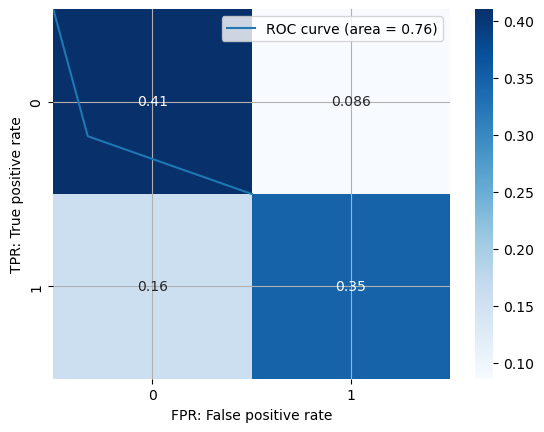

In [ ]:
XGBoostClassifier(X_train, X_test, y_train, y_test, study)

In [ ]:
X_resampled = pd.read_csv("X_resampled.csv", index_col=0)
y_resampled = pd.read_csv("y_resampled.csv", index_col=0)

X_resampled = (X_resampled.mean()-X_resampled)/X_resampled.std()

model = RandomForestClassifier()
parameters = {  
    'n_estimators': [10, 20, 30, 50, 100, 300],     # 用意する決定木モデルの数
    'max_features': ('sqrt', 'log2','auto', None),  # ランダムに指定する特徴量の数
    'max_depth':    (10, 20, 30, 40, 50, None),     # 決定木のノード深さの制限値
}
gridsearch = GridSearchCV(estimator=model, param_grid=parameters, scoring="accuracy")
gridsearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': (10, 20, 30, 40, 50, None),
                         'max_features': ('sqrt', 'log2', 'auto', None),
                         'n_estimators': [10, 20, 30, 50, 100, 300]},
             scoring='accuracy')

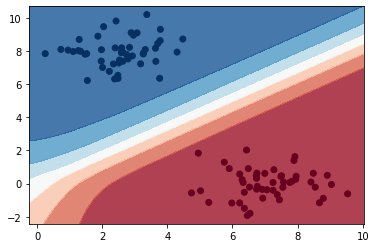

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":

    # サンプルデータを生成する
    x, y = make_blobs(n_samples=100, n_features=2, centers=2)

    # 分類モデル（※今回はニューラルネットワーク）を作成する
    estimator = MLPClassifier()
    estimator.fit(x, y)

    # サンプルデータの値域を求める
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5

    step = 0.02
    f1_range = np.arange(f1_min, f1_max, step)
    f2_range = np.arange(f2_min, f2_max, step)
    f1, f2 = np.meshgrid(f1_range, f2_range)

    # 決定境界を描画する
    Z = estimator.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
    Z = Z.reshape(f1.shape)

    plt.contourf(f1, f2, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdBu)
    plt.show()

In [ ]:
!pip install optuna
import xgboost as xgb
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 30.1 MB/s 
     |████████████████████████████████| 81 kB 11.2 MB/s 
     |████████████████████████████████| 209 kB 73.0 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 147 kB 66.7 MB/s 
     |████████████████████████████████| 112 kB 66.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=4d5e3142f3a778ee0d757f9091e2a5d44b87cbee0c4deb5b2a2f8d56575fdba5
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
!pip install seaborn_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 2.8 MB/s 
     |████████████████████████████████| 2.0 MB 9.2 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
from seaborn_analyzer import regplot
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

X_resampled = pd.read_csv("X_resampled.csv", index_col=0)
y_resampled = pd.read_csv("y_resampled.csv", index_col=0)

X_resampled = (X_resampled.mean()-X_resampled)/X_resampled.std()

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

# 乱数シード
seed = 42
# モデル作成
model = XGBRegressor(booster='gbtree', objective='reg:squarederror',
                     random_state=seed, n_estimators=10000)  # チューニング前のモデル
# 学習時fitパラメータ指定
fit_params = {'verbose': 0,  # 学習中のコマンドライン出力
              'early_stopping_rounds': 10,  # 学習時、評価指標がこの回数連続で改善しなくなった時点でストップ
              'eval_metric': 'rmse',  # early_stopping_roundsの評価指標
              'eval_set': [(X, y)]  # early_stopping_roundsの評価指標算出用データ
              }
# クロスバリデーションして決定境界を可視化
seed = 42  # 乱数シード
cv = KFold(n_splits=3, shuffle=True, random_state=seed)  # KFoldでクロスバリデーション分割指定
regplot.regression_heat_plot(model, USE_EXPLANATORY, OBJECTIVE_VARIALBLE, df_osaka,
                             pair_sigmarange = 0.5, rounddigit_x1=3, rounddigit_x2=3,
                             cv=cv, display_cv_indices=0,
                             fit_params=fit_params)

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import optuna

#Objective関数の設定
def objective(x, y, trial):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    params = {
        'objective': 'binary:logistic',
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0)
    }

    model = xgb.XGBClassifier(**params)
    model.fit(x_train, y_train)

    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, pred)
    return (1-accuracy)

if __name__ == '__main__':

    study = optuna.create_study()
    study.optimize(objective, n_trials=300)

    print(study.best_params)
    print(study.best_value)
    print(study.best_trial)

[I 2022-11-22 09:01:03,169] A new study created in memory with name: no-name-ba2cc7f5-a24c-45b2-8edb-2577caba2e50
[W 2022-11-22 09:01:03,171] Trial 0 failed because of the following error: TypeError("objective() missing 2 required positional arguments: 'y' and 'trial'")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
TypeError: objective() missing 2 required positional arguments: 'y' and 'trial'


TypeError: ignored

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
model = LGBMClassifier()

In [ ]:
parameters = {'max_depth': [4,6], 
              'n_estimators': [50,100,200]
              }

gridsearch = GridSearchCV(model, param_grid=parameters , verbose=0)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_, gridsearch.best_score_)

model = LGBMClassifier(**gridsearch.best_params_).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

roc = roc_curve(y_test, y_pred)
fpr, tpr, proba = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(fpr, tpr)

ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
plt.show()